<a href="https://colab.research.google.com/github/juanmed/dw_a/blob/main/EasyOCR_test_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+git://github.com/jaidedai/easyocr.git
!pip install wget

  Cloning git://github.com/jaidedai/easyocr.git to /tmp/pip-req-build-2bssecsg
  Running command git clone -q git://github.com/jaidedai/easyocr.git /tmp/pip-req-build-2bssecsg
  Created wheel for easyocr: filename=easyocr-1.3.0.1-cp37-none-any.whl size=62991026 sha256=5d9840a4c0361cd590d4c369d320c318c8fc81daf57e0302153594b6f53c8c78
  Stored in directory: /tmp/pip-ephem-wheel-cache-wg1afpz2/wheels/e8/77/61/a2618f4b50cdf417e0f3fd201f9814addc89e429bf05103fb3
Successfully built easyocr
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=1fa7612d12a2cd46ec6fd5998fa38dc8550b5f03240d57e43c3b343ba56711b5
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import easyocr
import pathlib as pl
import wget
import os
import cv2

images_path = "./images"
model_path = "./model"

if not os.path.exists(images_path):
  pl.Path(images_path).mkdir(parents=True, exist_ok=True)

base_url = 'https://raw.githubusercontent.com/juanmed/dw_a/main/dll_package_recognition/'
filenames = ['pkrecog_002_0005.jpg', 'pkrecog_003_0011.jpg', 'pkrecog_004_0010.jpg', 'pkrecog_006_0002.jpg', 'pkrecog_006_0009.jpg', 'pkrecog_006_0019.jpg', 'pkrecog_014_0011.jpg', 'pkrecog_020_0035.jpg', 'pkrecog_027_0003.jpg' , 'pkrecog_031_0006.jpg' , 'pkrecog_035_0011.jpg' ,'pkrecog_040_0016.jpg','pkrecog_045_0020.jpg']

for file in filenames:
  wget.download(os.path.join(base_url,file))

! mv *.jpg images/


In [4]:
IMAGE_PATHS = os.listdir("./images")
IMAGE_PATHS = ["./images/" + f for f in IMAGE_PATHS if "jpg" in f]

In [17]:
!pip install pillow

In [26]:
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip


--2021-04-02 04:51:41--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c02::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  86.3MB/s    in 1.3s    

2021-04-02 04:51:43 (86.3 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
!unzip NotoSansCJKkr-hinted.zip > /dev/null

In [31]:
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/


Using CPU. Note: This module is much faster with a GPU.


[([[232, 282], [342, 282], [342, 306], [232, 306]], '대응제약', 0.9284691214561462), ([[288, 314], [448, 314], [448, 340], [288, 340]], '비타민C 함유 감기약', 0.7120322330601584), ([[198, 310], [545, 310], [545, 435], [198, 435]], '스붙드다', 0.23832520842552185), ([[191, 417], [379, 417], [379, 453], [191, 453]], '종합감기 [ 몸실감기', 0.8230444468789997), ([[388, 423], [534, 423], [534, 455], [388, 455]], '코감기  목감기', 0.7734032835276915), ([[806, 402], [835, 402], [835, 469], [806, 469]], '틈', 0.28904847553949153), ([[377, 491], [451, 491], [451, 511], [377, 511]], '비타민c', 0.48204436898231506), ([[373, 509], [532, 509], [532, 542], [373, 542]], '비타민B B?', 0.3478468635697708), ([[183, 544], [251, 544], [251, 577], [183, 577]], 'Night', 0.7977716141243884), ([[395, 571], [445, 571], [445, 591], [395, 591]], '감기약', 0.9213261944608893), ([[759, 573], [833, 573], [833, 609], [759, 609]], '10정', 0.9966412456020421), ([[244.02202795004177, 519.1638810551212], [298.8615477522176, 527.0991423743019], [292.97797204995

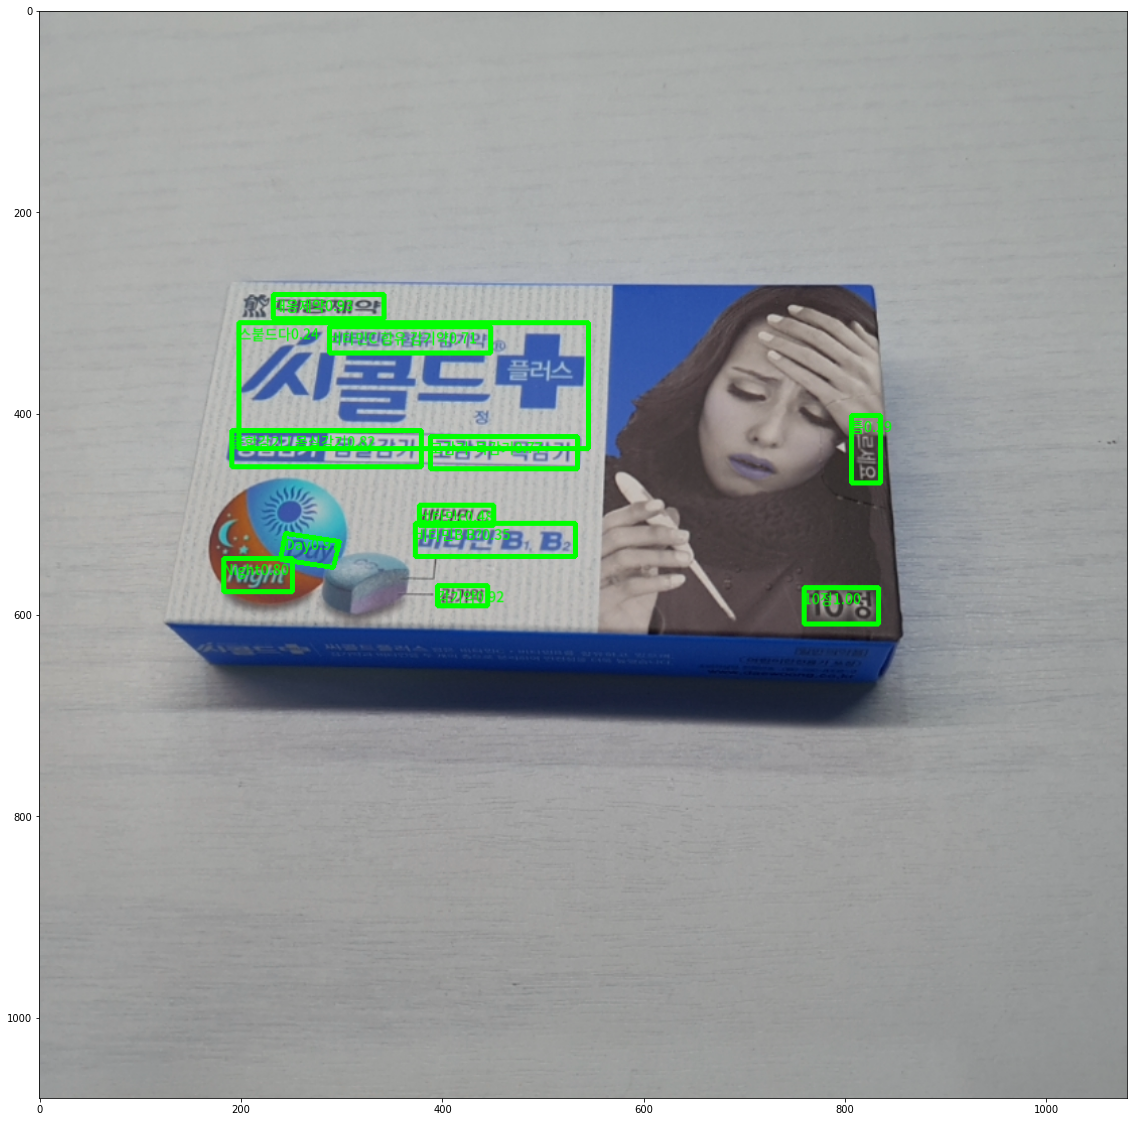

In [33]:
import matplotlib.pyplot as plt 
from PIL import ImageFont, ImageDraw, Image
import numpy as np

font = ImageFont.truetype("/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf",14)


for ind, image_path in enumerate(IMAGE_PATHS[:1]):
  in_image = cv2.imread(image_path)
  reader = easyocr.Reader(['ko','en'], gpu=False) # need to run only once to load model into memory
  result = reader.readtext(in_image)
  for detection in result:
    #draw line 
    points, text, score = detection
    cv2.line(in_image, (int(points[0][0]),int(points[0][1])), (int(points[1][0]),int(points[1][1])), (0,255,0),3)
    cv2.line(in_image, (int(points[1][0]),int(points[1][1])), (int(points[2][0]),int(points[2][1])), (0,255,0),3)
    cv2.line(in_image, (int(points[2][0]),int(points[2][1])), (int(points[3][0]),int(points[3][1])), (0,255,0),3)
    cv2.line(in_image, (int(points[3][0]),int(points[3][1])), (int(points[0][0]),int(points[0][1])), (0,255,0),3)
    #write text and confidence
    text2 = text + "{:.2f}".format(score)
    #cv2.putText(in_image, text2, (int(points[0][0]),int(points[0][1])), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0))
    img_pil = Image.fromarray(in_image)
    draw = ImageDraw.Draw(img_pil)
    draw.text((int(points[0][0]),int(points[0][1])),  text2, font = font, fill = (0,255,0,0))
    in_image = np.array(img_pil)

  plt.figure(figsize=(20,20))
  #plt.title("Contours")
  plt.imshow(in_image)
  print(result)

In [23]:
%%bash
fc-match -f "%{file}\n" ttf 

/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
